# Исследование данных рынка игр

# План проекта
## Основные задачи
1. Выявить определяющие успешность игры закономерности, что позволит спланировать рекламные кампании для интернет-магазина "Стримчик";
2. Изучить данные и определить года выпусков игр, определить наиболее популярные игровые платформы по продажам в год;
3. Оценить за актуальный период популярность платформ, какие растут и какие падают, чтобы в дальнейшем сделать вывод о потенциально прибыльных платформах;
4. Изучить влияние на продажи внутри одной популярной платформы отзывы пользователей и критиков;
5. Оценить прибыльность игр по жанрам;
6. Составить портрет пользователя каждого региона. Определить самый популярный жанр и платформу для каждого региона и оценить влияние рейтинга ESRB на продажи;
7. Сравнить средние пользовательские рейтинги платформ Xbox One и PC и провести ttest на их равенство;
8. Сравнить средние пользовательские рейтинги жанров Action и Sports и провести ttest на их различие.


## Краткий план работы
1. Рассмотреть и описать данные
2. Обработать данные: заменить название столбцов, преобразовать данные в нужный тип, обработать дубликаты и аномальные значения там, где это возможно. Добавить отдельный столбец с суммарной продажей во всех регионах. Отдельно разобрать это значение 'tbd' в столбце с оценкой пользователей
3. Провести исследовательский анализ по жанрам и платформам игр, визуализировать данные там, где это необходимо и сделать выводы. Оценить продажы по жанрам и платформам.
4. Составить портрет пользователя по регионам. Определить: топ-5 популярных жанром и платформ, влияние рейтинга ESRB на продажи в отдельном регионе
5. Проверить необходимые гипотезы о средних пользовательских рейтингах
6. Сделать общий вывод по проекту

## Описание данных
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## 1. Загрузка данных

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

try:
    data = pd.read_csv('/games.csv',sep=',')
except:
    data = pd.read_csv('/datasets/games.csv',sep=',')

FileNotFoundError: [Errno 2] No such file or directory: '/datasets/games.csv'

In [ ]:
data.info()
print('Количество строк на момент загрузки файла:',data.shape[0])
data.head(10)

**Промежуточный вывод:**
1) В данных необходимо заменить название столбцов (привести все к нижнему регистру)
2) Заполнить Nan-значения там, где это возможно
3) Проверить данные на дубликаты в столбце "Название игры"
4) Изменить тип данных в столбцах (Например, в столбце "Год релиза" поменять тип данных с float на int)
5) Просмотреть текстовые данные на возможные опечатки

## 2. Предобработка данных

### 2.1. Переименование столбцов

In [3]:
list(data) #выведем отдельно названия столбцов

['Name',
 'Platform',
 'Year_of_Release',
 'Genre',
 'NA_sales',
 'EU_sales',
 'JP_sales',
 'Other_sales',
 'Critic_Score',
 'User_Score',
 'Rating']

Как можно заметить, большинство все столбцы имееют верхний регистр. Поэтому используем функцию замены названий "data.columns".

In [4]:
data.columns = [
    'name',
    'platform',
    'year_of_release',
    'genre',
    'na_sales',
    'eu_sales',
    'jp_sales',
    'other_sales',
    'critic_score',
    'user_score',
    'rating']

Выведем список ещё раз и убедимся, что все названия изменены:

In [5]:
list(data)

['name',
 'platform',
 'year_of_release',
 'genre',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'critic_score',
 'user_score',
 'rating']

### 2.2. Предобработка дубликатов и пропусков

#### 2.2.1. Предобработка пропусков

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
data.isna().sum()#посмотрим на общее кол-во пустных значений в данных через фукнцию isna()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

В столбце с названием игр содержится всего 2 пропуска. Выведем эти 2 строки.

In [8]:
data[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Просуски в данном случае полностью случайны. Об этих неизвестных играх мы можем только узнать, что они обе выпущены на платформу Sega и они 1993 года выпуска. Удалим пропуски с играми без названий, так как эти данные не помуг нам при дальнейших расчётах.

In [9]:
data = data.dropna(subset=['name'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


В столбце `year_of_release` содержит 269 пропусков, исследуем его.

In [10]:
data[data['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В данном случае также можно удалить пропуски в столбце. Мы не можем никак заполнить значения, так как каждая игра могла появиться на рынке в любой год в  зависимости от платформы и жанра. Например, Fifa выпускает версию всегда на "год вперед" (Fifa 2004 вышла в 2003 году). В случае с Space Invaders дата выхода - 1978 году на картрижной платформе 2600, которая сейчас не имеет популярности.\
\
Следуя из перечисленных выше довыдов, удалим пропуски в столбце 'year_of_release'.

In [11]:
data = data.dropna(subset=['year_of_release'])
data.isna().sum() #заодно совпало с удалением пропусков в столбце жанра

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Теперь разберемся со столбцом 'rating'. Выведем уникальные значения столбца и выясним какие там данные хранятся.

In [12]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

В столбце содержится 6676 пропусков, что слишком много.\
\
Как было выяснено из статьи, рейтинг ESRB присвается играм по наличию ненормативной лексики, насилия и другим условиям, чтобы дети не видели всего ужаса. Но есть предположение, что пропуски можно заменить на значение RP - категория ещё не присвоена.\
\
Рассмотрим строки, содержащие пропуски:

**Тщательно изучив вопрос, никак нельзя заполнить Nan-значения рейтингом RP**

<div style="border-radius: 15px; box-shadow: 2px 2px 4px; border: 1px solid; background:#bdc3c7; position: relative; padding: 15px; padding-left: 50px;">
    <b>Объяснение:</b>
    
К рейтингу часто приписываются краткие пояснения, которые призваны обосновать его. Эти пояснения можно найти на обратной стороне коробки с игрой (http://www.gamer.ru/everything/reytingi-esrb-ot-a-do-ya).

<b>1 причина</b>.
    
    Игры, представленные выше уже вышли в релиз и не стоят на очереди на получение рейтинга. Игре не
    присвоен именно ESRB рейтинг, так как игра является открытой для любого пользователя.
    
(Пример, Тетрис 1989 года - https://gamefaqs.gamespot.com/gameboy/585960-tetris/data?validate=1)
    
<b>2 причина</b>.
    
    Игра выпущена локально и не имеет рейтинга ESRB в принципе. Например, Haitaka no Psychedelica судя 
    по данным имеет продажи только в Японии и в открытых источниках можно увидеть, что имеет рейтинг 
    CERO (Computer Entertainment Rating Organization).

In [13]:
data[data['rating'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [14]:
#заменим nan-значения на without, так как рейтинг может быть не определен по разным
#причинам (еще не определен, игра разрешена для всех)
data['rating'] = data['rating'].fillna('without')
data['rating'].unique()

array(['E', 'without', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Пропуски в остальных столбцах мы не сможем удалить, так как это сильно отобразиться на конечных выводах и расчётах в целом. Поэтому пустые значения мы оставим как есть. В исследовательском анализе мы не будем использовать эти данные, а при проверке гипотез используем только имеющиеся данные.

In [15]:
data.shape[0]#выведем кол-во строк после заполнения пропусков
#общее кол-во строк сократилось на 271 строку

16444

#### 2.2.2. Предобработка дубликатов

Проверим данные на наличие дубликатов методом duplicated().sum()

In [16]:
data.duplicated().sum()#увы, дубликатов не обнаружено

0

Теперь проверим вторым способом, вызвав метод value_counts() в столбцах, где могут встретиться дубликаты. Такими столбцами могут быть: name, platform, genre.

In [17]:
data['genre'] = data['genre'].str.lower()#приведем жанр к нижнему регистру и проверим на дубликаты
data['genre'].value_counts()

action          3307
sports          2306
misc            1721
role-playing    1481
shooter         1296
adventure       1293
racing          1226
platform         878
simulation       857
fighting         837
strategy         673
puzzle           569
Name: genre, dtype: int64

In [18]:
data['platform'].value_counts()#в данном случае также нет дубликатов

PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

In [19]:
data['name'].value_counts()#а этот столбец необходимо рассмотреть подробнее, так как имеется много дубликатов

Need for Speed: Most Wanted                                 12
Ratatouille                                                  9
LEGO Marvel Super Heroes                                     9
FIFA 14                                                      9
LEGO Star Wars II: The Original Trilogy                      8
                                                            ..
My World, My Way (US sales)                                  1
Majesty 2: The Fantasy Kingdom Sim                           1
Killer Loop                                                  1
Katekyoo Hitman Reborn! DS: Fate of Heat - Hono no Unmei     1
Lotus Challenge                                              1
Name: name, Length: 11426, dtype: int64

In [20]:
data[data['name'] == 'Need for Speed: Most Wanted']#проверим строки с самой популярной игрой по версии value_counts()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,racing,0.71,1.46,0.06,0.58,NaN,NaN,without
1190,Need for Speed: Most Wanted,X360,2012.0,racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,racing,0.33,0.45,0.01,0.22,NaN,NaN,without
3581,Need for Speed: Most Wanted,GC,2005.0,racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,racing,0.13,0.12,0.00,0.02,NaN,NaN,without
6410,Need for Speed: Most Wanted,DS,2005.0,racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Данные показали, что дубликаты образовались не просто так. Оказалось, что выпуск игры с одним и тем же названием связан с выпуском игры в разные года на разных платформах. Поэтому мы не можем удалить дубликаты в данном случае.

Рассмотрим неполные дубликаты в столбах год релиза игры, название игры и платформа.

In [21]:
#отобразим поиск дубликатов по 3-м столбац сразу
display(data[data.duplicated(subset=['name','platform','year_of_release'],keep='first')])
display(data[data.duplicated(subset=['name','platform','year_of_release'],keep='last')])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012.0,sports,0.0,0.01,0.0,0.0,83.0,5.5,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,sports,2.11,0.22,0.0,0.23,83.0,5.5,E


In [22]:
print('Количество строк на момент загрузки файла:',data.shape[0])

Количество строк на момент загрузки файла: 16444


In [23]:
#были найдены дублирующиеся значения в столбце name, игра - Madden NFL 13
#устраним дубликаты
data = data.drop_duplicates(subset=['name','platform','year_of_release'])

In [24]:
#проверим результат и выведем кол-во строк
display(data[data.duplicated(subset=['name','platform','year_of_release'],keep='first')])
display(data[data.duplicated(subset=['name','platform','year_of_release'],keep='last')])
print('Количество строк на момент загрузки файла:',data.shape[0])
#все как и планировалось, дубликаты убраны

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Количество строк на момент загрузки файла: 16443


### 2.3. Изменение типов данных

In [25]:
data.info()#выведим данные через info(), чтобы посмотреть типы данных

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       9838 non-null   object 
 10  rating           16443 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Заменим тип данных в столбце 'year_of_release' на тип данных int.

In [26]:
data['year_of_release'] = data['year_of_release'].astype('int')
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,without
2,Mario Kart Wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,without


In [27]:
data['critic_score'].unique()#проверим столбец оценок игр критиками

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

В столбце оценки критиков видно, что все оценки не содержат дробной части, поэтому заменим тип float на int.

In [28]:
data['critic_score'] = data['critic_score'].astype('float')
data['critic_score'].head()

0    76.0
1     NaN
2    82.0
3    80.0
4     NaN
Name: critic_score, dtype: float64

Выведем столбец 'user_score' и посмотрим, почему тип данных - object, а не float.

In [29]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В данных присутствуют данные с текстовым форматом, а именно аббревиатура "tbd". "TBD" с "геймерского" языка расшифровывается как "To Be Determined", что означает "Дата выхода не определена". Соответственно, заменим tbd на Nan значения, так как мы не сможем использовать их в исследовании, а остальные даннные столбца заменим на тип float.

Подробнее о TBD - https://fb.ru/article/171345/tbd---chto-znachit-eto-sokraschenie" \
https://www.kingston.com/ru/blog/gaming/understanding-video-games-age-ratings-esrb-pegi

In [30]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan
data['user_score'] = data['user_score'].astype('float')
data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


После замены tbd значений в столбце user_score кол-во Non-null значений уменьшилось на 2424 значения.\
Остальное оставим без изменения, так как больше нет необходимых изменений в типах данных.

### 2.4. Создание столбца с суммарными продажами во всех регионах.

In [32]:
#посчитаем суммарную выручку для каждой игры сложением 4 столбцов продаж по регионам
data['income'] = data['na_sales'] + data['jp_sales'] + data['eu_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,income
0,Wii Sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,without,40.24
2,Mario Kart Wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,without,31.38


### Вывод по предобработке:
1) Все столбцы были приведены к нижнему регистру;
2) Данные столбца 'year_of_release','critic_score' были изменены на int. Данные столбца 'user_score' были изменены на тип float, а также значение tbd заменено на Nan-значение, т.к. термин означает "Дата выхода не определена". Соответсвенно, по ним мы не сможем сделать определенные выводы (пустых строк стало больше на 2424). Пустые значения rating были заменены на without, так как рейтинг ещё не определен (замена пустых значений повлияет на оценку влияния рейтинга ESRB);
3) Были удалены пустые значения в столбце 'name' (2 строки), в столбце 'year_of_release' (т.к. нельзя заполнить данные). Всего было убрано 271 строки, которые не повлияют на вывод в проекте (доля меньше 5%);
4) При помощи функции value_counts() были обнаружены дубликаты в данных. Были рассмотрены на дубликаты 3 столбца: имена, жанры и платформы. В каждом из них не было явных дубликатов, поэтому данные остались без удаления.
5) В данные добавлен отдельный столбец с суммарной продажей игры во всех регионах.\
\
Финальный размер данных - 16.444 строки. Все возможные пропуски и дубликаты были удалены.

In [33]:
print('Кол-во строк после предобработки:',data.shape[0])

Кол-во строк после предобработки: 16443


## 3. Исследовательский анализ данных

### 3.1. Количество выпущенных игр за каждый представленный год

Определим важность периодов выпуска игр. Напишем строку, где мы сможем наблюдать кол-во выпущенных игр за каждый год.

In [34]:
data['year_of_release'].value_counts().sort_index(ascending=False)

2016     502
2015     606
2014     581
2013     544
2012     652
2011    1136
2010    1255
2009    1426
2008    1427
2007    1197
2006    1006
2005     939
2004     762
2003     775
2002     829
2001     482
2000     350
1999     338
1998     379
1997     289
1996     263
1995     219
1994     121
1993      60
1992      43
1991      41
1990      16
1989      17
1988      15
1987      16
1986      21
1985      14
1984      14
1983      17
1982      36
1981      46
1980       9
Name: year_of_release, dtype: int64

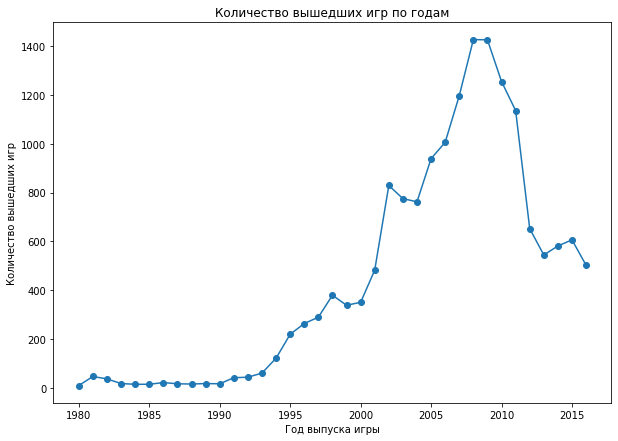

In [35]:
#построим диаграмму выпуска игр по годам
#для начала создадим сводную таблицу с нужжными нам данными
games_per_year = data.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index()
#так как мы строим распределение игр по годам, используем линейную гистограмму
fig, ax = plt.subplots(figsize=(10,7))
ax.set(title='Количество вышедших игр по годам',
       xlabel='Год выпуска игры', ylabel='Количество вышедших игр')
ax.plot(games_per_year['year_of_release'], games_per_year['name'], '-o')
ax.grid=True
plt.show()

Как можно наблюдать, в период с 1980 года по 1993 было выпущено суммарно примерно как в 2000 г. Как печально это бы не звучало, но Марио 80-х и 90-х не поможет в анализе данных и период с 1980 по 1995 году не является важным периодом в контексте исследования данных.\
\
В 1994 году показатель выпуска игр вырос в 2 раза. В период по 2005 г. число игр в год активно увеличивалось и уже в 2006 г. перевалило за 1000 игр в год.\
\
Период с 2007 по 2011 г. можно выделить как "золотой" выпуск игр, так как выпускалось наибольшее кол-во игр за весь временной промежуток.\
\
Наименьшее количество выпущенных игр было в 1980 году - 9 игр, а наибольшее количество было выпущено в 2008 - 1427 игр (на 1 игру больше, чем в 2009 году).\
\
Таким образом, "хвост" данных в период до 1995 года является не показательным и его можно отбросить.

### 3.2. Суммарные продажи по платформам

Выведем список платформ по сумме продаж:

In [36]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,income
0,Wii Sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,without,40.24
2,Mario Kart Wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,without,31.38


In [37]:
profitable_platforms = (data
                        .pivot_table(index='platform', values='income', aggfunc='sum')
                        .reset_index()
                        .sort_values(by='income', ascending=False)
                        .reset_index(drop=True)
                        .head(11)
                   )
profitable_platforms

,platform,income
0,PS2,1233.56
1,X360,961.24
2,PS3,931.33
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


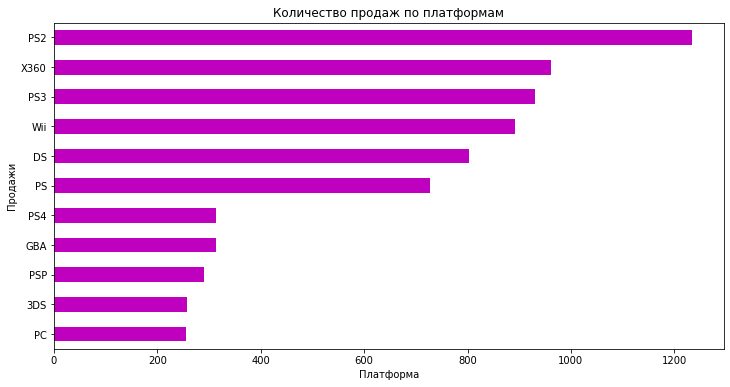

In [38]:
profitable_platforms.sort_values(by='income',ascending=True).plot(
    kind='barh',
    y='income',
    x='platform',
    color='m',
    legend=False, title='Количество продаж по платформам',
    figsize=(12, 6)).set(xlabel='Платформа',ylabel='Продажи');

In [39]:
#сохраним в отдельный список топ платформ для построения рсспределения
platforms = profitable_platforms['platform']
platforms

0      PS2
1     X360
2      PS3
3      Wii
4       DS
5       PS
6      PS4
7      GBA
8      PSP
9      3DS
10      PC
Name: platform, dtype: object

Возьмём первые 10 платформ, как самые выгодные по суммарным продажам и построим распределение по годам. Использовать будем временную линейную диаграмму.

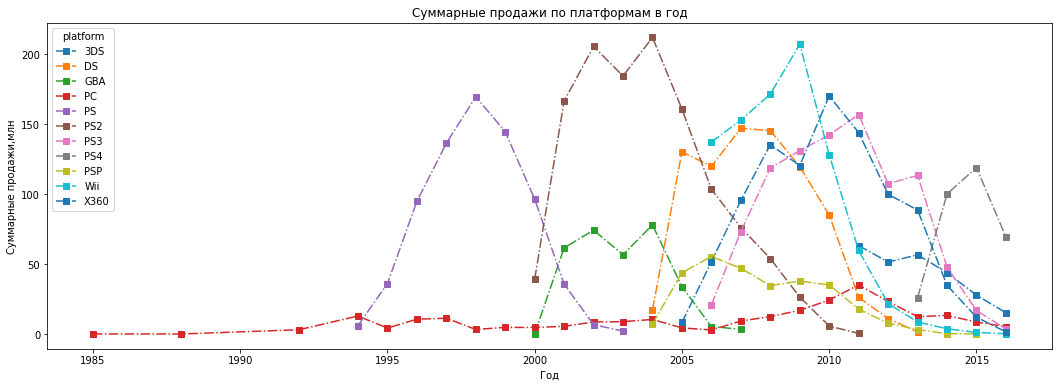

In [40]:
#создадим сводную талицу суммарной выручки по платформам за каждый год
#и пропишем функцию plot с параметрами
pd.pivot_table(data.loc[data['platform'].isin(platforms)],
        index='year_of_release',
        columns='platform',
        values='income',
        aggfunc='sum').plot(
    figsize=(18,6),
    ls='-.',
    marker='s',
    title='Суммарные продажи по платформам в год',
    xlabel='Год',
    ylabel='Суммарные продажи,млн');

На графике мы можем наблюдать следующую картину:

- С 1995 года не переставая выпусукаются игры на персональный компьютер (PC). Можно сказать, что это самая стабильная и востребованная платформа за весь временной промежуток.
- На графике можно увидеть тенденцию, что игры на Playstation начали набирать популярность с 1994 года. Первая "плойка" достигла пика по продажам к 1998 году и уже в 2002-2003 годах канула в лету с выходом PS2 в 2000 году. С 2000-го года  Playstation2 с 2001 по 2005 гг. лидировали на рынке игр по продажам, но с 2005 г. по 2010 г. пошла в откат. Также как PS2 заменила PS, PS3 заменила PS2, но такого пикового значения уже не достигла. Пик продаж у PS3 был в 2011 году, а в 2016 г. уже стала не популярна и была заменена PS4. PS4 показывает уже не такие результаты относительно своих предшественников.
- Спад популярности PS-платформ мог быть также связан с выходом в 2004 г. Nintendo DS, которые набрали моментальную популярность в 2005-2010 гг. C 2006 по 2010 гг. были популярны игры на платформе Wii, которая показала колосальные значения по продажам, уступая только PS2.
- Xbox, извечный противник PlayStation, в 2005 г. показал себя, выпустив игровую платформу X360. Пиковое значение X360 достиг в 2010 г. и с этого момента пошёл постепенно на спад.

Из всех этих платформ самая продаваемая по сумме продаж - PS2. Как было сказано, в период 2000-2005 гг. у PS2 не было конкурентоспособных аналогов. Можно сказать, что второе место занимает Wii-приставка от Nintendo, а третье место делят между собой DS, Xbox360, Playstation3.Непопулярными среди топ-10 платформ остаются GBA, PC, PSP.\
\
Проведя данный вид анализа, можно сделать вывод, что период до 1994 года не является актуальным для анализа. До 1994 года выходило слишком мало игр относительно общей выборки. Примерный срок, за который устаревает платформа, составляет около 8-12 лет.

### 3.3. Потенциально прибыльные платформы за актуальный период

Необходимо определить какие платформы лидируют по продажам, какие растут, а какие падают. За актуальный период примем 2013-2016 гг. Актуальность обуславливается тем, что мы возьмём большую часть платформ актуальных по сей день. На многие платформы перестали выпускаться игры в 2015 г. и ранее.

In [41]:
#создадим график по сводной таблице
actual_period = data.query('year_of_release >= 2013')

In [42]:
actual_platforms = actual_period.pivot_table(
    index='platform',
    columns='year_of_release',
    values='income',
    aggfunc='sum')
actual_platforms

year_of_release,2013,2014,2015,2016
platform,,,,
3DS,56.57,43.76,27.78,15.14
DS,1.54,NaN,NaN,NaN
PC,12.38,13.28,8.52,5.25
PS3,113.25,47.76,16.82,3.60
PS4,25.99,100.00,118.90,69.25
PSP,3.14,0.24,0.12,NaN
PSV,10.59,11.90,6.25,4.25
Wii,8.59,3.75,1.14,0.18
WiiU,21.65,22.03,16.35,4.60


In [43]:
#удалим Nan-значения, которых всего 3 в таблице
actual_platforms.dropna(subset = [2016], inplace = True)
actual_platforms

year_of_release,2013,2014,2015,2016
platform,,,,
3DS,56.57,43.76,27.78,15.14
PC,12.38,13.28,8.52,5.25
PS3,113.25,47.76,16.82,3.60
PS4,25.99,100.00,118.90,69.25
PSV,10.59,11.90,6.25,4.25
Wii,8.59,3.75,1.14,0.18
WiiU,21.65,22.03,16.35,4.60
X360,88.58,34.74,11.96,1.52
XOne,18.96,54.07,60.14,26.15


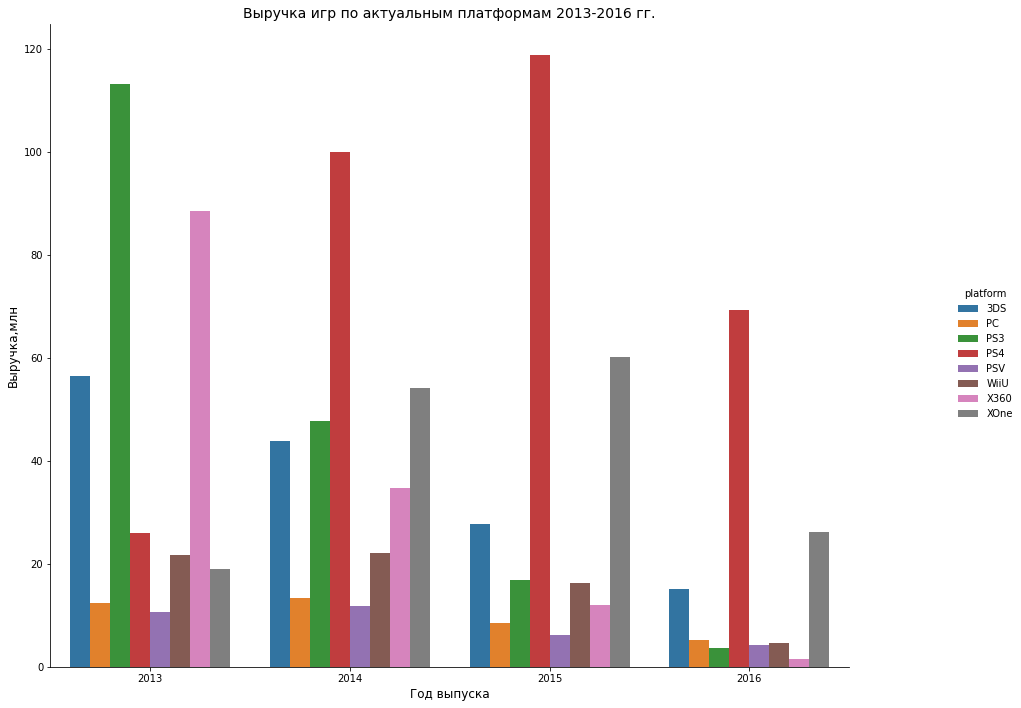

In [44]:
actual_platforms = (actual_period
                              .loc[(actual_period['platform'].isin(("3DS", "PS4", "PSV", "WiiU", "XOne", "PC", "X360", "PS3"))==True) & (
                                  actual_period['year_of_release'].isin((2013, 2014, 2015, 2016))==True)]
                              .pivot_table(index=['platform', 'year_of_release'], values='income', aggfunc='sum')
                              .reset_index()
                 )
plot = sns.catplot(x='year_of_release', y='income', hue="platform", kind="bar", data=actual_platforms)
plt.title("Выручка игр по актуальным платформам 2013-2016 гг.", fontsize=14)
plt.xlabel('Год выпуска', fontsize=12)
plt.ylabel('Выручка,млн', fontsize=12)
plot.fig.set_size_inches(15,10)

Получился список лидирующих платформ на 2016 год и потенциально прибыльные в 2017 году. Сделаем по графику вывод потенциально прибыльных платформ на 2017 год.\
\
Обратим на 2016 год. Лидером является PS4. Второе место по выручке занимает XOne, третье - 3DS. PS3 показывает спад с годами на фоне своего последователя, PS4. PC и PSV показывают низкие значения в течении временного промежутка. Аустайдер в 2016 году - X360, которую также затмил последователь,XOne.\
\
В потенциально прибыльные сразу можно выделить PS4, XOne, 3DS. Снижение спроса на игры приходится на платформах 3DS, PlaystationVita и WiiU, и возможно, что могут показать себя довольно хорошо в следующих годах с выходом обновленных версий платформ, поэтому внесем их тоже в список потенциально прибыльных платформ.

### 3.4. Глобальные продажи игр в разбивке по платформам за актуальный период.

In [45]:
profitable_platforms = pd.Series(actual_platforms['platform'].unique())
popular_games = actual_period.loc[actual_period['platform'].isin(profitable_platforms)==True].reset_index(drop=True)
popular_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,income
0,Grand Theft Auto V,PS3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,without,14.63
3,Pokemon X/Pokemon Y,3DS,2013,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,without,14.60
4,Grand Theft Auto V,PS4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [46]:
#cоздадим pivot_table() для построения boxplot()
global_sales = popular_games.pivot_table(index=['platform', 'name'], values='income', aggfunc='sum').reset_index()
global_sales

,platform,name,income
0,3DS,Beyblade Burst,0.03
1,3DS,Fire Emblem Fates,1.67
2,3DS,Frozen: Olaf's Quest,0.59
3,3DS,Haikyu!! Cross Team Match!,0.04
4,3DS,12-Sai. Honto no Kimochi,0.07
...,...,...,...
2130,XOne,XCOM 2,0.04
2131,XOne,ZombiU,0.01
2132,XOne,Zombie Army Trilogy,0.11
2133,XOne,Zoo Tycoon (2013),0.36


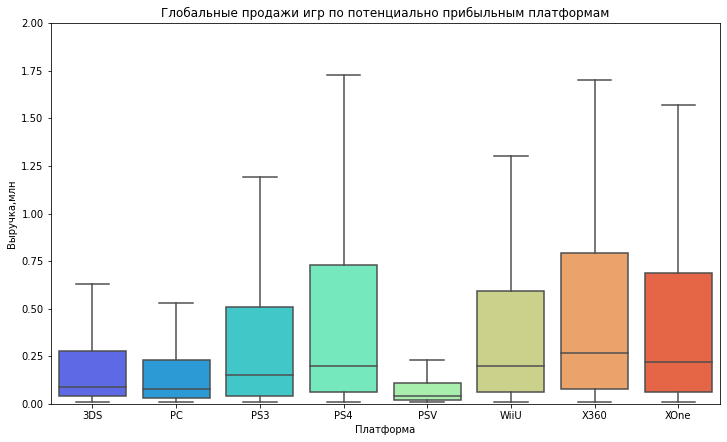

In [47]:
#настроим размер фигуры
plt.figure(figsize=(12,7))
#построим boxplot
sns.boxplot(
    data=global_sales,
    x='platform',
    y='income',
    palette='rainbow',
    showfliers=False
)
#настроим окружение диаграммы
plt.title("Глобальные продажи игр по потенциально прибыльным платформам")
plt.ylim(0, 2)
plt.xlabel('Платформа')
plt.ylabel('Выручка,млн')
plt.show()

Все boxplot-графики показывают скос данных вправо и превышение среднего значения над медианным. Можно распределить силу скоса по возрастанию: X360, PS4, и XOne сильнее всего, затем WiiU и PS3, последние 3DS, PC и небольшой boxplot PSVita. Также видны различия в медианных значениях: игры на PS4, X360 и XBoxOne сильно схожие графики, а WiiU и PS3 характеризуются меньшим значением; затем идёт 3DS, PC и PSV.\
\
Можно сделать предположение, что скос в данных и различия в медианных значениях могли произойти из-за разнобразия игр на ведущих платформах. PS и XBox популярны среди потребителей долгое время, поэтому выпускают больше игрового контента в разной ценовой категории для каждой потребительской группы. Следовательно, графики этих компаний шире и растянутее. WiiU также известная консоль, но менее популярная в сравнении с PS и Xbox. Соответственно, разнообразие игр на данной платформе ниже. PSVita - консоль с небольшим разнообразием игр. Разброс по данной платформе самый небольшой.

### 3.5. Влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы .

Построим матрицу корреляции и диаграммы рассеяния на основе PS4 (самой популярной платформы) между отзывами и продажами.

In [48]:
ps4_rating = actual_period.query('critic_score != -1 and user_score != -1')
ps4 = ps4_rating[ps4_rating['platform'] == 'PS4']
columns = ['user_score', 'critic_score', 'income']

In [49]:
#посчитаем корреляцию между отзывами пользователей, критиков и продажами
ps4[columns].corr()

,user_score,critic_score,income
user_score,1.000000,0.557654,-0.031957
critic_score,0.557654,1.000000,0.406568
income,-0.031957,0.406568,1.000000


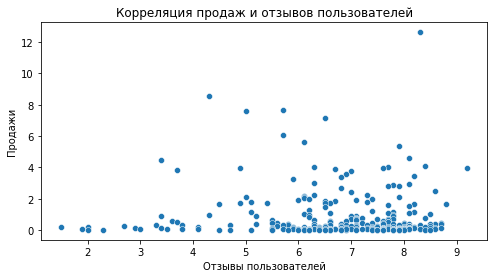

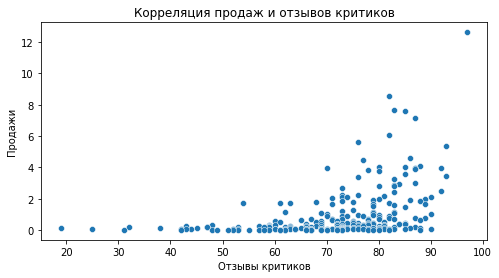

In [50]:
#построим диаграмму рассеяния по отзывам пользователей
plt.figure(figsize=(8,4))
sns.scatterplot(data=ps4, x='user_score', y='income')
plt.title(label='Корреляция продаж и отзывов пользователей')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Продажи');
#построим диаграмму рассеяния по отзывам критиков
plt.figure(figsize=(8,4))
sns.scatterplot(data=ps4, x='critic_score', y='income')
plt.title(label='Корреляция продаж и отзывов критиков')
plt.xlabel('Отзывы критиков')
plt.ylabel('Продажи');

Судя по графикам и матрице корреляции можно сделать следующие выводы:
* Отсутствует взаимосвязь между оценками пользователей и продажами
* Имеется низкая взаимосвязь между оценками критиков и продажами
* Есть взаимосвязь между оценками критиков и пользователей (0.56)
* Также присутствует связь между оценками критиков и продажами\
\
Следуя из исследования, высокая оценка критиков не гарантирует высокие продажи игр для PS4, пользовательские оценки не гарантирую продажи вовсе.

### 3.6. Соотнесение выводов с продажами игр на других платформах

**Выберем другие популярные платформы для сравнения вывода, который получился в случае с PS4**.

In [51]:
top_platforms = ["3DS", "PSV", "WiiU", "XOne", "PC", "X360", "PS3"]

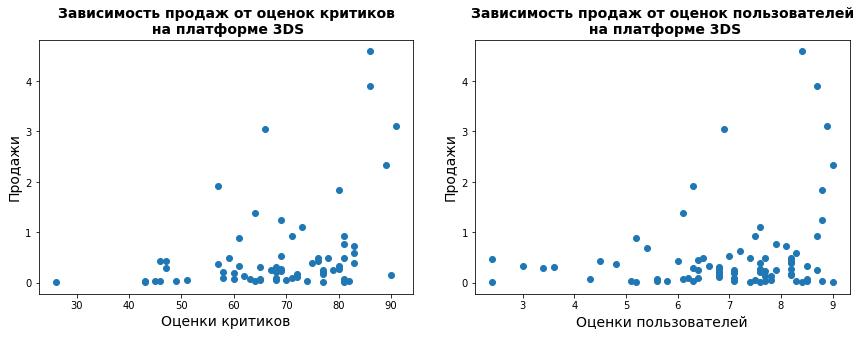

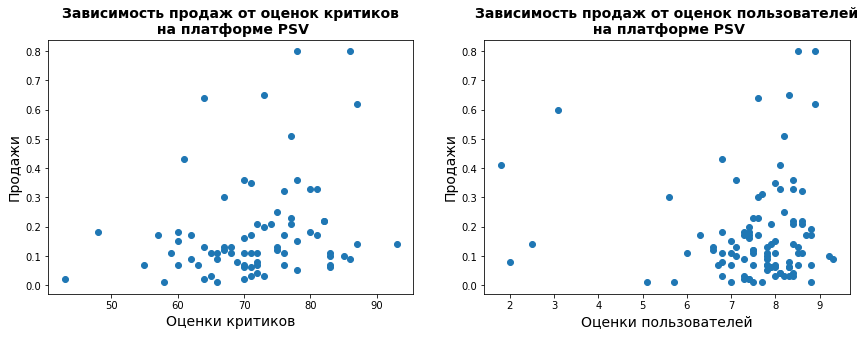

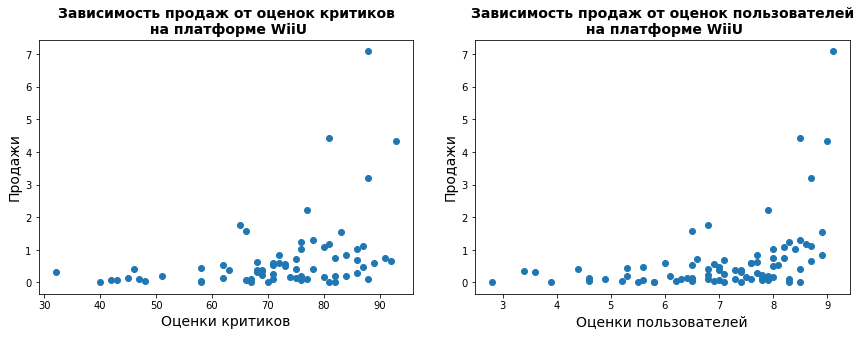

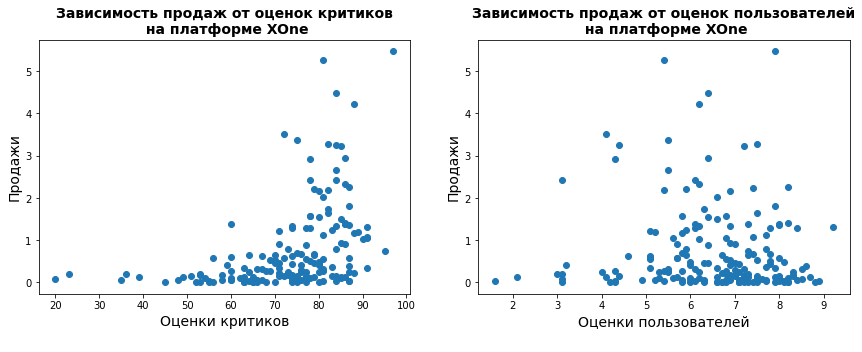

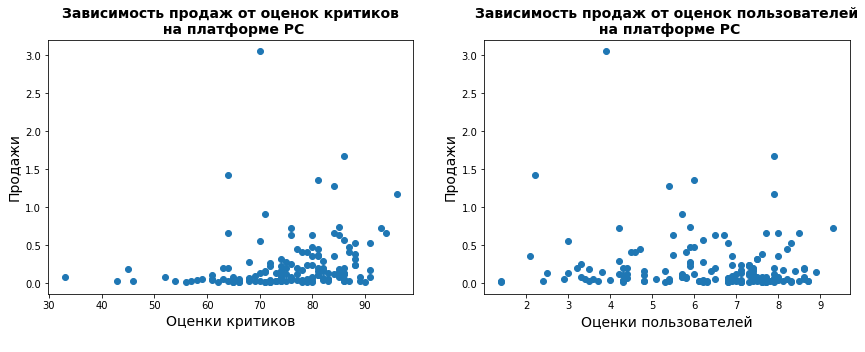

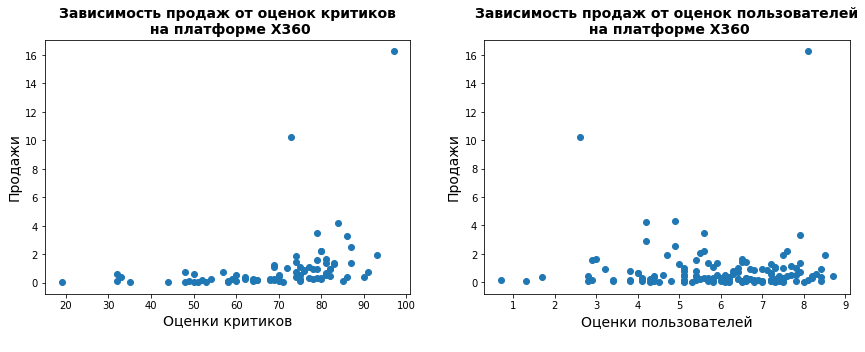

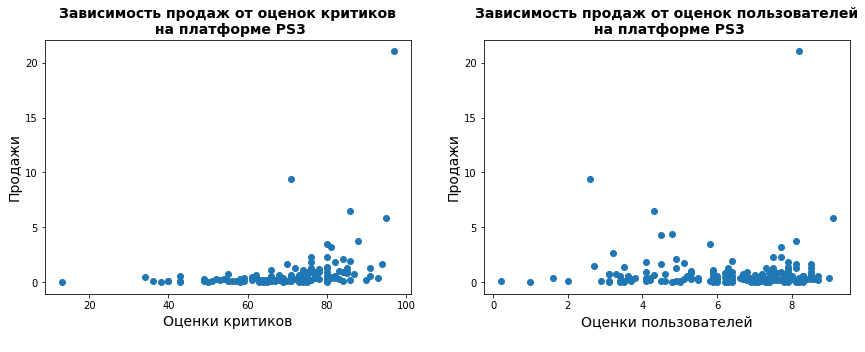

In [52]:
#используем цикл для построения диаграмм рассеяния
for i in top_platforms:
    x_critic = ps4_rating[ps4_rating['platform']==i]['critic_score']
    y_critic = ps4_rating[ps4_rating['platform']==i]['income']
    
    x_user = ps4_rating[ps4_rating['platform']==i]['user_score']
    y_user = ps4_rating[ps4_rating['platform']==i]['income']
    
    
    fig = plt.figure(figsize=(12, 5))
    
    ax1 = fig.add_subplot(121)
    ax1.scatter(x_critic, y_critic)
    ax1.set_title('Зависимость продаж от оценок критиков\n на платформе ' + i, fontsize=14, fontweight="bold")
    ax1.set_xlabel('Оценки критиков\n', fontsize=14)
    ax1.set_ylabel('Продажи', fontsize=14)
    
    ax2 = fig.add_subplot(122)
    ax2.scatter(x_user, y_user)
    ax2.set_title('Зависимость продаж от оценок пользователей\n на платформе ' + i, fontsize=14, fontweight="bold")
    ax2.set_xlabel('Оценки пользователей\n', fontsize=14)
    ax2.set_ylabel('Продажи', fontsize=14)
    
    plt.tight_layout(w_pad=3)

In [53]:
!pip install tabulate
from tabulate import tabulate
for i in top_platforms:
    print(i)
    print('{: <30.2}{: <30.2}'.format(ps4_rating[ps4_rating['platform']==i]['income']\
                                   .corr(ps4_rating[ps4_rating['platform']==i]['critic_score'])\
                                   
                                   , ps4_rating[ps4_rating['platform']==i]['income']\
                                   .corr(ps4_rating[ps4_rating['platform']==i]['user_score'])))

 
#обозначим данные для таблицы
corr_data = [
    ["3DS","0.36","0.24"],
    ["PSV","0.25","0.00094"],
    ["WiiU","0.38","0.42"],
    ["XOne","0.42","-0.069"],
    ["PC","0.2","-0.094"],
    ["X360","0.35","-0.012"],
    ["PS3","0.33","0.0024"]]
 
# create header
head = ["Платформа","Корреляция продажи/критики","Корреляция продажи/пользователи"]
 
# display table
print(tabulate(corr_data, headers=head, tablefmt="grid"))

3DS
0.36                          0.24                          
PSV
0.25                          0.00094                       
WiiU
0.38                          0.42                          
XOne
0.42                          -0.069                        
PC
0.2                           -0.094                        
X360
0.35                          -0.012                        
PS3
0.33                          0.0024                        
+-------------+------------------------------+-----------------------------------+
| Платформа   |   Корреляция продажи/критики |   Корреляция продажи/пользователи |
+=============+==============================+===================================+
| 3DS         |                         0.36 |                           0.24    |
+-------------+------------------------------+-----------------------------------+
| PSV         |                         0.25 |                           0.00094 |
+-------------+------------------------------

**Вывод:** \
В целом можно сказать, что ситуация по другим платформам схожа с PS4.\
\
В случае 3DS, WiiU прослеживается низкая взаимосвязь между продажами и отзывами как критиков, так и пользователей. В случае PSV, XOne, PC, X360 и PS3 больше влияют на продажи отзывы критиков, но влияние все равно низкое. Отзывы пользователей не влияют на продажи.\
\
Относительно графиков можно отметить, что объем продаж резко возрастает при оценке критиков от 60 и пользователей от 6 баллов, в некоторых случаях от 4 баллов.

### 3.7. Общее распределение игр по жанрам

Построим диаграммы и сделаем вывод о самых прибыльных жанрах. Выделим жанры с высокими и низкими продажами, если такие имеются. Для начала построим boxplot-график, где по абциссе будут лежать жанры, а по ординате выручка с продаж.

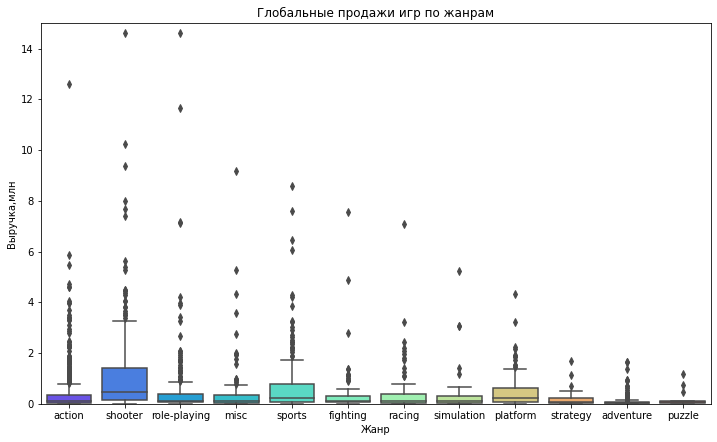

In [54]:
#установим размер графика
plt.figure(figsize=(12,7))
#построим график с выбросами
sns.boxplot(x="genre", y="income", data=actual_period, palette='rainbow', showfliers=True)
#настроим окружение
plt.title("Глобальные продажи игр по жанрам")
plt.xlabel('Жанр')
plt.ylabel('Выручка,млн')
plt.ylim(0, 15)
plt.show()

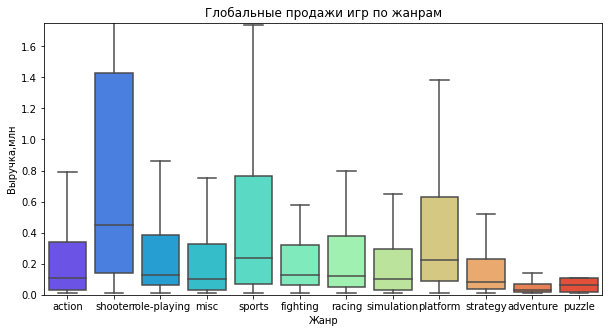

In [55]:
#установим размер графика
plt.figure(figsize=(10,5))
#построим график без выбросов
sns.boxplot(x="genre", y="income", data=actual_period, palette='rainbow', showfliers=False)
#настроим окружение
plt.title("Глобальные продажи игр по жанрам")
plt.xlabel('Жанр')
plt.ylabel('Выручка,млн')
plt.ylim(0,1.75)
plt.show()

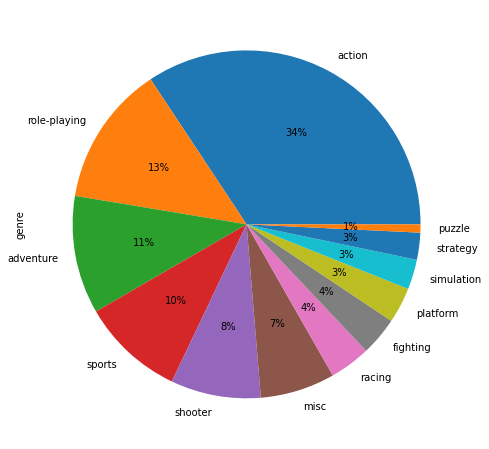

In [56]:
actual_period['genre'].value_counts().plot(kind='pie', figsize=(8,8), autopct = '%1.0f%%', legend=False);

In [57]:
#рассмотрим подробнее информацию
#построим сводную таблицу по жанрам и продажам
(actual_period.pivot_table(
    index='genre',
    values='income',
    aggfunc='sum').sort_values(by='income', ascending=False).reset_index()
)

,genre,income
0,action,321.87
1,shooter,232.98
2,sports,150.65
3,role-playing,145.89
4,misc,62.82
5,platform,42.63
6,racing,39.89
7,fighting,35.31
8,adventure,23.64
9,simulation,21.76


In [58]:
#теперь рассмотрим данные о кол-ве выпущенных игр по жанрам
popularity_genres = data.groupby('genre').agg({'name':'count'}).reset_index()
popularity_genres.sort_values(by='name', ascending=False).head(10)

,genre,name
0,action,3307
10,sports,2305
3,misc,1721
7,role-playing,1481
8,shooter,1296
1,adventure,1293
6,racing,1226
4,platform,878
9,simulation,857
2,fighting,837


**Вывод:** 

* Наиболее прибыльным жанром на рынке является Action. Всего Action принёс 312,87 млн выручки и продажи по кол-ву игр составили 3307.
* На втором месте после жанра Action стоит Shooter (232.98 млн), но при этом игр в этом жанре продано в 2 раза меньше, чем в Action. Средний и медианный уровни продаж жанра Shooter выше значений других жанров, а датасет в разрезе данного жанра сильно скошен вправо. Следовательно, шутеры - перспективный жанр для продаж.
* На третьем месте по доходу за анализируемый актуальный период - Sport. Для спортивных игр характерна та же ситуация, что и для игр в жанре Action. В основном доходность зависит от объема выпускаемых игр.
* Меньше всего выручки принёс жанр puzzle, при этом данный жанр не сильно популярен среди игроков и кол-во выпущеных игр 569. Жанр strategy выглядит более перспективным, так как опережая пазлы всего на 100 игр, выручка со стратегий в 3 раза больше.
* Самым непереспективным выглядит жанр adventure, который выпускается в достаточно больших количествах, но приносит очень мало выручки. По распределению наибольшее число игр было продана за низкую цену, по сравнению с другими жанрами.\
\
Таким образом, самым прибыльным и популярным жанром является жанр action. Выделим также shooter, так как это высокодоходный жанр, учитывая небольшое кол-во игр на рынке.\
Самые низкие по продаваемости можно выделить жанры Puzzle и Strategy. Выделяется наименее прибыльный и довольно популярный жанр adventure, который не выглядит прибыльным в будущем.

## 4. Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5)
* Самые популярные жанры (топ-5)
* Влияние рейтинга ESRB на продажи в отдельном регионе

### 4.1. Самые популярные платформы

In [59]:
#исследуем данные по актуальному периоду (2013-2016гг.) в Северной Америке
na_platforms = (actual_period
                .pivot_table(index='platform',values='na_sales',aggfunc='sum')
                .sort_values(by='na_sales',ascending=False)
                .reset_index()
               )
na_platforms['na_ratio_sales'] = round(na_platforms['na_sales'] / sum(na_platforms['na_sales']), 3)
na_platforms = na_platforms.head()
na_platforms

,platform,na_sales,na_ratio_sales
0,PS4,108.74,0.248
1,XOne,93.12,0.213
2,X360,81.66,0.187
3,PS3,63.50,0.145
4,3DS,38.20,0.087


In [60]:
#исследуем данные по актуальному периоду (2013-2016гг.) в Европе
eu_platforms = (actual_period
                .pivot_table(index='platform',values='eu_sales',aggfunc='sum')
                .sort_values(by='eu_sales',ascending=False)
                .reset_index()
               )
eu_platforms['eu_ratio_sales'] = round(eu_platforms['eu_sales'] / sum(eu_platforms['eu_sales']), 3)
eu_platforms = eu_platforms.head()
eu_platforms

,platform,eu_sales,eu_ratio_sales
0,PS4,141.09,0.360
1,PS3,67.81,0.173
2,XOne,51.59,0.132
3,X360,42.52,0.108
4,3DS,30.96,0.079


In [61]:
#исследуем данные по актуальному периоду (2013-2016гг.) в Японии
jp_platforms = (actual_period
                .pivot_table(index='platform',values='jp_sales',aggfunc='sum')
                .sort_values(by='jp_sales',ascending=False)
                .reset_index()
               )
jp_platforms['eu_ratio_sales'] = round(jp_platforms['jp_sales'] / sum(jp_platforms['jp_sales']), 3)
jp_platforms = jp_platforms.head(5)
jp_platforms

,platform,jp_sales,eu_ratio_sales
0,3DS,67.81,0.482
1,PS3,23.35,0.166
2,PSV,18.59,0.132
3,PS4,15.96,0.113
4,WiiU,10.88,0.077


Опишем различия в долях продаж:

In [62]:
platforms_ratio = na_platforms.merge(
    eu_platforms,
    on='platform',
    how='outer').merge(
    jp_platforms,
    on='platform',
    how='outer'
)
platforms_ratio.drop(['na_sales', 'eu_sales', 'jp_sales'], axis='columns', inplace=True)
platforms_ratio.sort_values(by='platform').reset_index(drop=True)
platforms_ratio.columns = ['platform','na_ratio','eu_ratio','jp_ratio']
platforms_ratio

,platform,na_ratio,eu_ratio,jp_ratio
0,PS4,0.248,0.360,0.113
1,XOne,0.213,0.132,NaN
2,X360,0.187,0.108,NaN
3,PS3,0.145,0.173,0.166
4,3DS,0.087,0.079,0.482
5,PSV,NaN,NaN,0.132
6,WiiU,NaN,NaN,0.077


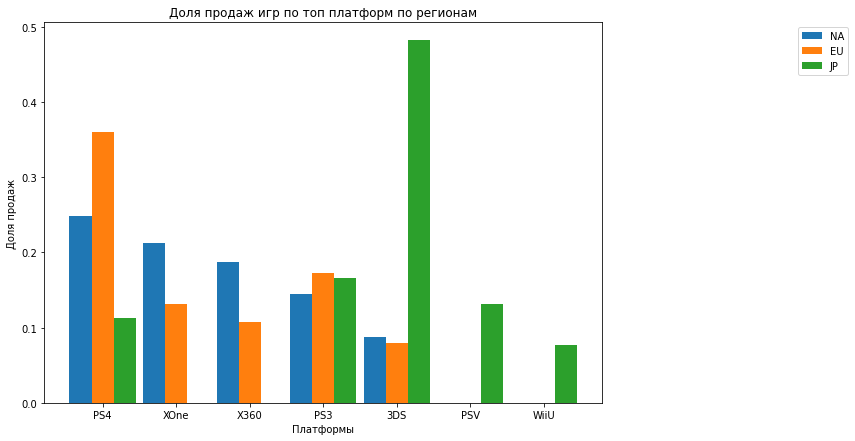

In [63]:
#построим subplots для сравнения долей продаж по платформам в разных регионах
#столбцы наиболее показательные при сравнении, так как можно сравнить их высоту
fig, ax = plt.subplots(figsize=(10,7))
ax.set(title='Доля продаж игр по топ платформ по регионам',
       xlabel='Платформы', ylabel='Доля продаж')
x1 = np.arange(0,7) - 0.3
x2 = np.arange(0,7)
x3 = np.arange(0,7) + 0.3
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['PS4', 'XOne', 'X360', 'PS3', '3DS', 'PSV', 'WiiU'])
ax.bar(x1, platforms_ratio['na_ratio'], width=0.3, label='NA')
ax.bar(x2, platforms_ratio['eu_ratio'], width=0.3, label='EU')
ax.bar(x3, platforms_ratio['jp_ratio'], width=0.3, label='JP')
ax.grid=True
ax.legend(bbox_to_anchor=(1.45, 1))
plt.show()

**Вывод по долям:** 
* Доля продаж PS4 выше всего в Европе, а ниже всего в Японии;
* Доля продаж XOne выше всего в Серверной Америке и менее популярна в Европе. В Японии Xbox не пользуется популярностью;
* С X360 обстоят дела также, как и с XOne, только показатели доли ниже (na_xone = 0.213 vs. na_xone = 0.187, eu_x360 = 0.132 vs. eu_x360 = 0.108);
* Доли продаж больше всего схожи у PS3 во всех регионах, но все же PS3 имеет преимущество в Европе;
* Доли продаж 3DS показывает колосальный уровень в Японии (0.482), в Северной Америке и Европе показатели продаж намного ниже (0.087 и 0.079, соответсвенно);
* PSV и WiiU показывает продажи только в Японии

**Вывод по топ-5 платформам для каждого региона:** \
Сформировав списки топ-платформ для каждого региона, сделаем вывод:
* Топ 5 платформ для Северной Америки:
    1. PS4
    2. XOne
    3. X360
    4. PS3
    5. 3DS
* Топ 5 платформ для Европы:
    1. PS4
    2. PS3
    3. XOne
    4. X360
    5. 3DS
* Топ 5 платформ для Японии:
    1. 3DS
    2. PS3
    3. PSV
    4. PS4
    5. WiiU

### 4.2. Самые популярные жанры

In [64]:
#также исследуем данные по актуальному периоду (2013-2016гг.) в Северной Америке
na_genres = (actual_period
                .pivot_table(index='genre',values='na_sales',aggfunc='sum')
                .sort_values(by='na_sales',ascending=False)
                .reset_index()
               )
na_genres['na_ratio_genres'] = round(na_genres['na_sales'] / sum(na_genres['na_sales']), 3)
na_genres = na_genres.head()
na_genres

,genre,na_sales,na_ratio_genres
0,action,126.05,0.288
1,shooter,109.74,0.251
2,sports,65.27,0.149
3,role-playing,46.40,0.106
4,misc,27.49,0.063


In [65]:
eu_genres = (actual_period
                .pivot_table(index='genre',values='eu_sales',aggfunc='sum')
                .sort_values(by='eu_sales',ascending=False)
                .reset_index()
               )
eu_genres['eu_ratio_genres'] = round(eu_genres['eu_sales'] / sum(eu_genres['eu_sales']), 3)
eu_genres = eu_genres.head()
eu_genres

,genre,eu_sales,eu_ratio_genres
0,action,118.13,0.301
1,shooter,87.86,0.224
2,sports,60.52,0.154
3,role-playing,36.97,0.094
4,racing,20.19,0.051


In [66]:
jp_genres = (actual_period
                .pivot_table(index='genre',values='jp_sales',aggfunc='sum')
                .sort_values(by='jp_sales',ascending=False)
                .reset_index()
               )
jp_genres['jp_ratio_genres'] = round(jp_genres['jp_sales'] / sum(jp_genres['jp_sales']), 3)
jp_genres = jp_genres.head(5)
jp_genres

,genre,jp_sales,jp_ratio_genres
0,role-playing,51.04,0.363
1,action,40.49,0.288
2,misc,9.20,0.065
3,fighting,7.65,0.054
4,shooter,6.61,0.047


In [67]:
#Опишем различия в долях продаж:
genres_ratio = na_genres.merge(
    eu_genres,
    on='genre',
    how='outer').merge(
    jp_genres,
    on='genre',
    how='outer'
)
genres_ratio.drop(['na_sales', 'eu_sales', 'jp_sales'], axis='columns', inplace=True)
genres_ratio.sort_values(by='genre').reset_index(drop=True)
genres_ratio.columns = ['genre','na_ratio','eu_ratio','jp_ratio']
genres_ratio

,genre,na_ratio,eu_ratio,jp_ratio
0,action,0.288,0.301,0.288
1,shooter,0.251,0.224,0.047
2,sports,0.149,0.154,NaN
3,role-playing,0.106,0.094,0.363
4,misc,0.063,NaN,0.065
5,racing,NaN,0.051,NaN
6,fighting,NaN,NaN,0.054


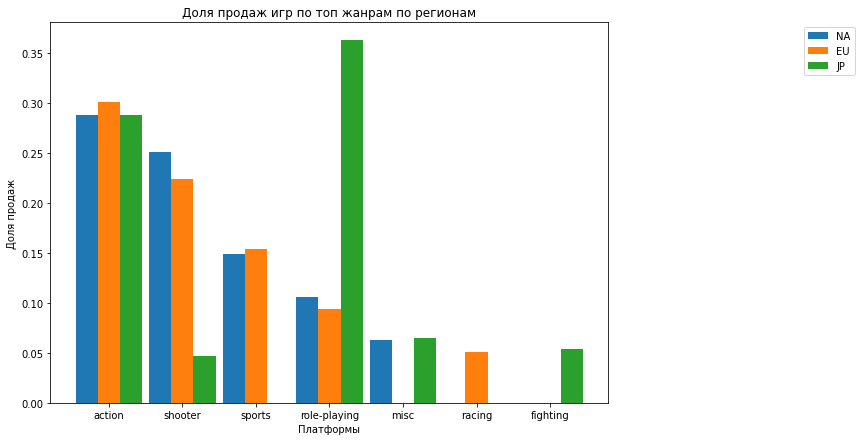

In [68]:
#построим subplots для сравнения долей продаж по жанрам в разных регионах
#также используем столбчатую диаграмму
fig, ax = plt.subplots(figsize=(10,7))
ax.set(title='Доля продаж игр по топ жанрам по регионам',
       xlabel='Платформы', ylabel='Доля продаж')
x1 = np.arange(0,7) - 0.3
x2 = np.arange(0,7)
x3 = np.arange(0,7) + 0.3
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['action', 'shooter', 'sports', 'role-playing', 'misc', 'racing', 'fighting'])
ax.bar(x1, genres_ratio['na_ratio'], width=0.3, label='NA')
ax.bar(x2, genres_ratio['eu_ratio'], width=0.3, label='EU')
ax.bar(x3, genres_ratio['jp_ratio'], width=0.3, label='JP')
ax.grid=True
ax.legend(bbox_to_anchor=(1.45, 1))
plt.show()

**Вывод по топ-5 жанрам для каждого региона:** \
Сформировав списки топ-жанров для каждого региона, сделаем вывод:
* Топ 5 жанров для Северной Америки:
    1. Action
    2. Shooter
    3. Sports
    4. Role-playing
    5. Misc
* Топ 5 платформ для Европы:
    1. Action
    2. Shooter
    3. Sports
    4. Role-playing
    5. Racing
* Топ 5 платформ для Японии:
    1. Role-playing
    2. Action
    3. Misc
    4. Fighting
    5. Shooter

**Вывод по долям продаж:** 
* Доля продаж жанра Action самая высокая среди всех жанров, если не учитывать огромное значение role-play в Японии. Во всех регионах почти доля продаж занимает 30%;
* Доля продаж жанра Shooter выше всего в Серверной Америке и не менее популярна в Европе (25% и 22,4% соотвественно). В Японии жанр Shooter не пользуется популярностью (всего 5% от общих продаж);
* Жанр Sports занимает 15% от рынка Северной Америки и Европы, а в Японии является не популярным жанром;
* Жанр Role-playing самый популярный жанр в Японии и занимает целых 36% от рынка. В других регионах этот жанр не так популярен (около 10% от рынка в СА и Ев.);
* Жанр Misc или Miscellaneous на 3 месте по популярности в Японии и на 5 месте у Северной Америки (и там, и там по 6%) - относительно небольшая доля на рынке;
* Жанр Fighting показывает продажи только в Японии за актуальный период. Доля составляет 5%. (Tekken и Mortal Combat уже явно уходят от популярности в мире)

### 4.3. Влияние рейтинга ESRB на продажи в отдельном регионе

,rating,na_sales,na_ratio
0,M,165.21,0.377
1,without,89.42,0.204
2,E,79.05,0.181
3,E10+,54.24,0.124
4,T,49.79,0.114


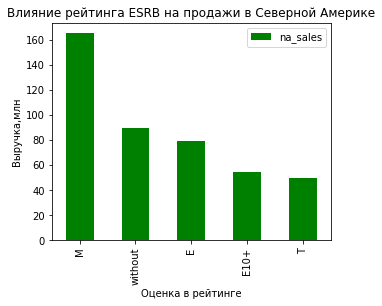

In [69]:
#Проверим влияние при помощи построения сводной таблицы и столбчатой диаграммы
na_esrb = (actual_period
    .pivot_table(index='rating', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
    .reset_index()
          )
na_esrb['na_ratio'] = round(na_esrb['na_sales'] / sum(na_esrb['na_sales']), 3)
na_esrb.plot(
    kind='bar',
    x='rating',
    y='na_sales',
    color='g',
    figsize=(5,4))
plt.title('Влияние рейтинга ESRB на продажи в Северной Америке')
plt.xlabel('Оценка в рейтинге')
plt.ylabel('Выручка,млн');
na_esrb

* На 1 месте Северной Америке за анализируемый период являются игры c рейтингом M (17+) - 37,7% от продаж;
* На 2 месте игры, которые помечены как "без рейтинга" - 20,4% от продаж;
* На 3 месте игры с рейтингом E (0+) - 18%;
* На 4 месте игры с рейтингом E10+ (10+) - 12,4%;
* На 5 месте игры с рейтингом T (13+) - 11,4%;

,rating,eu_sales,eu_ratio
0,M,145.32,0.370
1,E,83.36,0.213
2,without,78.91,0.201
3,E10+,42.69,0.109
4,T,41.95,0.107


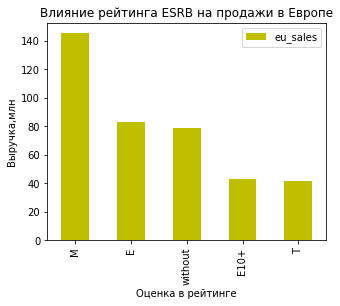

In [70]:
#Проверим влияние при помощи построения сводной таблицы и столбчатой диаграммы
eu_esrb = (actual_period
    .pivot_table(index='rating', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
    .reset_index()
          )
eu_esrb['eu_ratio'] = round(eu_esrb['eu_sales'] / sum(eu_esrb['eu_sales']), 3)
eu_esrb.plot(
    kind='bar',
    x='rating',
    y='eu_sales',
    color='y',
    figsize=(5,4))
plt.title('Влияние рейтинга ESRB на продажи в Европе')
plt.xlabel('Оценка в рейтинге')
plt.ylabel('Выручка,млн');
eu_esrb

* На 1 месте Европы за анализируемый период являются игры c рейтингом M (17+) - 37% от продаж;
* На 2 месте игры с рейтингом E (0+) - 21,3%;
* На 3 месте игры, которые помечены как "без рейтинга" - 20%;
* На 4 месте игры с рейтингом E10+ (10+) - 11%;
* На 5 месте игры с рейтингом T (13+) - 10,7%;

,rating,jp_sales,jp_ratio
0,without,85.05,0.604
1,T,20.59,0.146
2,E,15.14,0.108
3,M,14.11,0.100
4,E10+,5.89,0.042


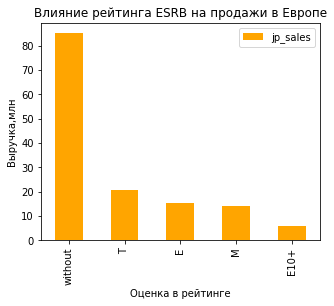

In [71]:
#Проверим влияние при помощи построения сводной таблицы и столбчатой диаграммы
jp_esrb = (actual_period
    .pivot_table(index='rating', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
    .reset_index()
          )
jp_esrb['jp_ratio'] = round(jp_esrb['jp_sales'] / sum(jp_esrb['jp_sales']), 3)
jp_esrb.plot(
    kind='bar',
    x='rating',
    y='jp_sales',
    color='orange',
    figsize=(5,4))
plt.title('Влияние рейтинга ESRB на продажи в Европе')
plt.xlabel('Оценка в рейтинге')
plt.ylabel('Выручка,млн');
jp_esrb

* На 1 месте Японии за анализируемый период являются игры "без рейтинга" - целых 60% от продаж;
* На 2 месте игры, которые помеченые T-рейтингом (13+) - 14,6% от продаж;
* На 3 месте игры с рейтингом E (0+) - 10,8%;
* На 4 месте игры с рейтингом M (17+) - 10%;
* На 5 месте игры с рейтингом E10+ (10+) - 4,2%;

Таким образом, в Северной Америке и Европе схожая структура продаж по рейтингу игр. В Японии предпочтения отличаются: подростковые игры более популярны, чем игры для взрослых, что свойственно культуре Японии (в детстве развлекаешься, а во взрослой жизни работаешь). Такой вывод можно сделать сравнив по продажам категории M (17+) с другими.

## 5. Проверка гипотез

### 5.1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

За генеральные совокупности возьмём две выборки: пользовательские рейтинги на платформе XOne и PC.

In [72]:
xone_rate = actual_period[(actual_period['platform'] == 'XOne') & (actual_period['user_score'] > 0)]['user_score']
pc_rate = actual_period[(actual_period['platform'] == 'PC') & (actual_period['user_score'] > 0)]['user_score']

Сформулируем нулевую и альтернативные гипотезы:\
**H0**: Средние двух выборок между собой равны;\
**H1**: Средние двух выборок между собой не равны.\
\
H0: μ1 = μ2\
H1: μ1 ≠ μ2\
\
Для проверки гипотезы будем использовать тест о равенстве средних двух генеральных совокупностей. Используем метод scipy.stats.ttest_ind(array1, array2, equal_var, alternative).

In [73]:
#импортируем модуль
from scipy import stats as st
#уровень значимости будет равен 5%.
alpha=.05
results = st.ttest_ind(xone_rate, pc_rate)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


#### Вывод по гипотезе №1. 
P-value меньше alpha и ttest показал, что мы не отвергаем нулевую гипотезу (H0). Соответсвенно, можно сделать вывод, что средние пользовательские рейтинги платформ XOne и PC равны между собой.

### 5.2. Средние пользовательские рейтинги жанров Action и Sports разные.

In [74]:
action_rate = actual_period[(actual_period['genre'] == 'action') & (actual_period['user_score'] > 0)]['user_score']
sports_rate = actual_period[(actual_period['genre'] == 'sports') & (actual_period['user_score'] > 0)]['user_score']

Сделаем проверку гипотезы по жанрам. Только в данном случае нас интересует, что средние пользовательские рейтинги **не равны**.\
\
Также сформулируем нулевую и альтернативные гипотезы:\
**H0**: Средние двух выборок между собой равны;\
**H1**: Средние двух выборок между собой не равны.\
\
H0: μ1 = μ2\
H1: μ1 ≠ μ2\
\
Для проверки гипотезы будем использовать тест о равенстве средних двух генеральных совокупностей. Используем метод scipy.stats.ttest_ind(array1, array2, equal_var, alternative).

In [75]:
#уровень значимости также равен 5%.
alpha=.05
results = st.ttest_ind(action_rate, sports_rate)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


#### Вывод по гипотезе №2. 
P-value больше alpha и ttest показал, что мы отвергаем нулевую гипотезу (H0). Соответсвенно, можно сделать вывод, что средние пользовательские рейтинги жанров Action и Sports не равны между собой и гипотеза о различии подтвердилась.

## 6. Общий вывод

Была проведена аналитика по исторических данным из открытых источников о продажах игр. В данных столбцы были приведены к нижнему регистру, nan-значения, где возможно, заполнены, проверены и устранены дубликаты в столбце 'name', изменены типы данных.\
\
После просмотра и предобработки данных были исследованы данные по различным параметрам: год, платформа, жанр, отзывы пользователей и критиков.\
Самым непоказательным отрезком времени оказался с 1980 г. по 1995 г., поскольку в данный отрезок времени было выпущено довольно мало игр и у игровых платформ не было явных конкурентов. Актульный период для прогнозирования на 2017 г. был определён 2013-2016 гг., так как на этот момент используется новейшее поколение игровых платформ и уже сформировались потребительские предпочтения относительно платформ и жанров игр в разных регионах и в целом по миру.\
\
Из всех этих платформ самая продаваемая по сумме продаж с 1990 г. по 2016 г. - PS2. Как было сказано, в период 2000-2005 гг. у PS2 не было конкурентоспособных аналогов. Можно сказать, что второе место занимает Wii-приставка от Nintendo, а третье место делят между собой DS, Xbox360, Playstation3. Непопулярные среди топ-10 платформ - GBA, PC, PSP. Примерный срок, за который устаревает платформа, составляет около 8-12 лет.\
\
В потенциально прибыльные за актуальный период (2013-2016 гг.) были выделены PS4, XOne, 3DS. Снижение спроса на игры приходится на платформах 3DS, PlaystationVita и WiiU, но эти платформы также могут показать себя довольно хорошо в следующих годах с выходом более новых версий платформ.\
\
Относительно разнообразия игрового контента, PS и XBox популярны среди потребителей долгое время, поэтому выпускают больше игрового контента в разной ценовой категории для каждой потребительской группы. WiiU также известная консоль, но менее популярная в сравнении с PS и Xbox. Соответственно, разнообразие игр на данной платформе ниже. PSVita - консоль с небольшим разнообразием игр. Разброс по данной платформе самый небольшой.\
\
Из проведенного анализа влияния отзывов пользователей и критиков на продажи, сделан вывод, что высокая оценка критиков не гарантирует высокие продажи игр (связь слабая - 0,41), а пользовательские оценки не гарантирую продажи вовсе (очень слабая связь - 0 - 0,2). В случае 3DS, WiiU прослеживается низкая взаимосвязь между продажами и отзывами как критиков, так и пользователей. В случае PSV, XOne, PC, X360 и PS3 больше влияют на продажи отзывы критиков, но влияние все равно низкое. Отзывы пользователей не влияют на продажи. Относительно графиков можно отметить, что объем продаж возрастает при оценке критиков от 60 и пользователей от 6 баллов, в некоторых случаях от 4 баллов.\
\
В анализа данных были созданы основные предпочтения пользователей по платформам, жанрам по регионам (Северная Америка, Европа и Япония). Топ-5 платформ и жанров представлены в пункте 4 (Портрет пользователя каждого региона). Также было оценено влияние рейтинга ESRB на продажи в каждом регионе (можно увидеть в пункте 4.3).\
\
В ходе проверки гипотез удалось заключить, что пользовательские рейтинги платформ Xbox One и PC одинаковые, а средние пользовательские рейтинги жанров Action и Sports разные. Тестирование было проведено при помощи ttest-а о равенстве двух генеральных совокупностей. Уровень значимости был приведен к стандартному значению - 5%.\
\
Одной из задач исследования было выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Следует обратить внимание на следующие закономерности:
1) Срок устаревания платформы 8-12 лет. В лучшем случае можно сделать ставку на новую версию платформы;
2) Актуальный период для аналитики - 3-5 лет, так как обновленные данные покажут актуальность платформы, жанра и игры;
3) Количество выпускаемых игр на платформу;
4) Обратить внимание на оценку ESRB относительно местоположения интернет-магазина "Стримчик" (необходимы дополнительные данные о деятельности магазина в других регионах);